05 - Análisis Exploratorio de Datos (EDA) sobre el DataFrame 'Terminales de Almacenamiento de Gas LP' - Univariable.

Objetivo: Efectuar el análisis univariable del DataFrame para indagar el comportamiento de este. 

IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos en línea
%matplotlib inline

# Formato de número
pd.set_option("display.float_format", "{:,.2f}".format)

# Estilo de fondo
sns.set_style(style='whitegrid')

# Estilo de escala y contexto
sns.set_context(context='notebook')

# Tamaño predeterminado a figuras
plt.rcParams['figure.figsize'] =(11,9.4)

IMPORTACIÓN DEL ARCHIVO

In [2]:
terminales_gaslp_df = pd.read_csv('../data/processed/terminales_gaslp_clean.csv',
                                    index_col=0)

VISIÓN GENERAL DEL DATASET

In [3]:
terminales_gaslp_df.head()

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar,Año,Capacidad_Diseño_barriles
5,TAR_CLP_CHS,Cactus GLP,Gas LP,Sur,Chiapas,Gas Licuado de Petróleo,2015,40000
30,TAR_MLP_TAM,Madero GLP,Gas LP,Noreste,Tamaulipas,Gas Licuado de Petróleo,2015,15000
47,TAR_PLP_VER,Pajaritos GLP,Gas LP,Golfo,Veracruz,Gas Licuado de Petróleo,2015,770464
56,TAR_PLP_PUE,Puebla GLP,Gas LP,Centro,Puebla,Gas Licuado de Petróleo,2015,20000
60,TAR_RLP_BJ,Rosarito GLP,Gas LP,Noroeste,Baja California,Gas Licuado de Petróleo,2015,40000


Tipos de columnas

In [4]:
terminales_gaslp_df.dtypes

ID_Terminal                  object
Nombre_Terminal              object
Tipo_Terminal                object
Región                       object
Estado                       object
Tipos_Productos_Almacenar    object
Año                           int64
Capacidad_Diseño_barriles     int64
dtype: object

Estadísticas básicas - Numéricas

In [5]:
terminales_gaslp_df.describe()

,Año,Capacidad_Diseño_barriles
count,10.00,10.00
mean,"2,015.00","117,946.40"
std,0.00,"236,277.20"
min,"2,015.00","4,000.00"
25%,"2,015.00","16,250.00"
50%,"2,015.00","30,000.00"
75%,"2,015.00","55,000.00"
max,"2,015.00","770,464.00"


Estadísticas básicas - Categóricas

In [6]:
terminales_gaslp_df.describe(include='object')

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar
count,10,10,10,10,10,10
unique,10,10,1,5,8,1
top,TAR_CLP_CHS,Cactus GLP,Gas LP,Centro,Puebla,Gas Licuado de Petróleo
freq,1,1,10,3,2,10


ANÁLISIS UNIDIMENSIONAL DE LAS VARIABLES

Regiones

In [7]:
terminales_gaslp_df['Región'].value_counts()

Región
Centro      3
Sur         2
Golfo       2
Noroeste    2
Noreste     1
Name: count, dtype: int64

/tmp/ipykernel_2705/167171696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


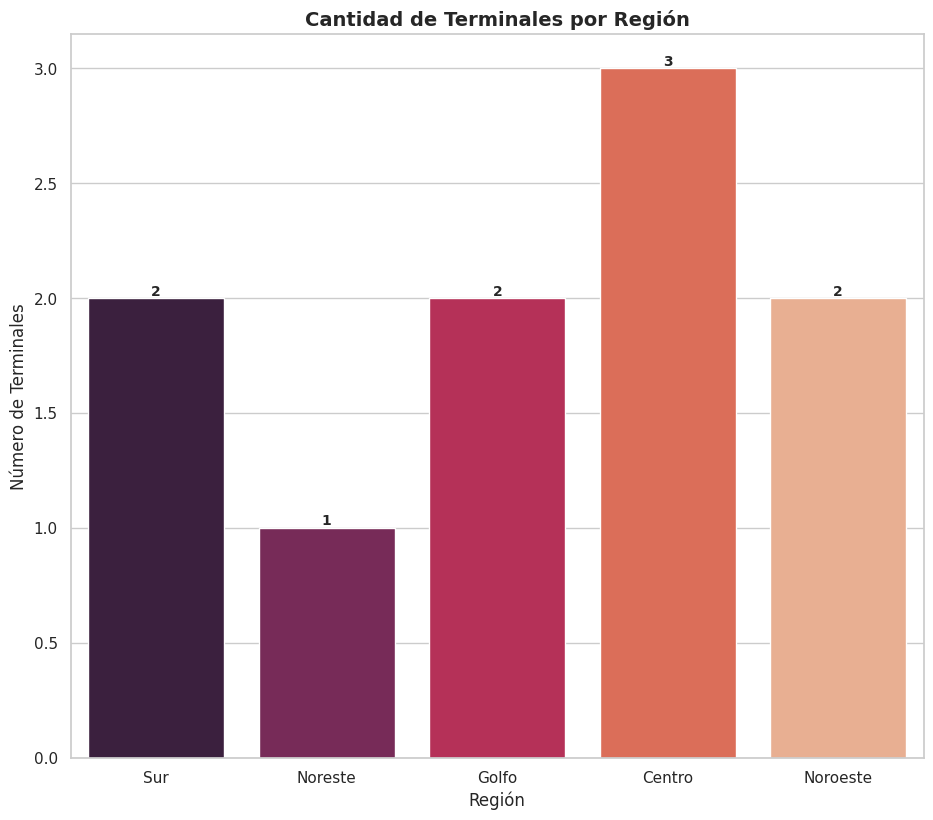

In [23]:
sns.countplot(
    data=terminales_gaslp_df,
    x='Región',
    palette='rocket'
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Cantidad de Terminales por Región',
            fontsize=14, fontweight='bold')

plt.xlabel('Región')
plt.ylabel('Número de Terminales')

plt.savefig('../reports/figures/01_datos_generales/05_terminales_gaslp_region.png',
            dpi=300, bbox_inches='tight')

Estado

/tmp/ipykernel_2705/4149689961.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


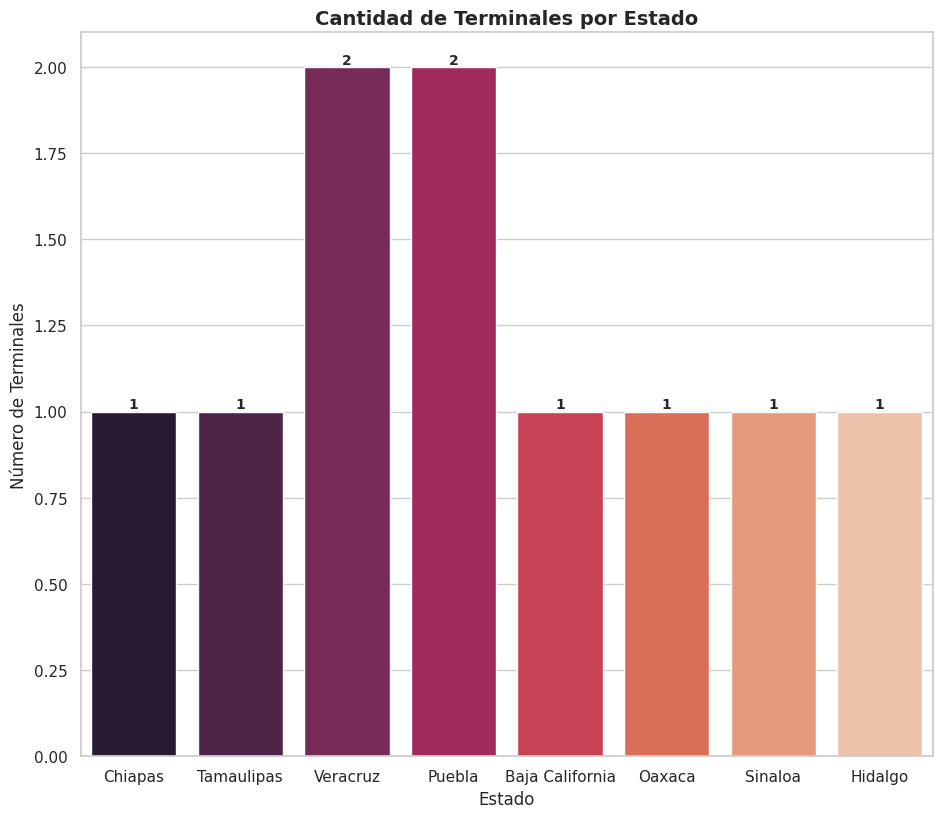

In [24]:
sns.countplot(
    data=terminales_gaslp_df,
    x='Estado',
    palette='rocket',
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Cantidad de Terminales por Estado',
          fontsize=14, fontweight='bold')

plt.xlabel('Estado')
plt.ylabel('Número de Terminales')

plt.savefig('../reports/figures/01_datos_generales/06_terminales_gaslp_estado.png',
            dpi=300, bbox_inches='tight')

Histograma de Capacidad de Diseño

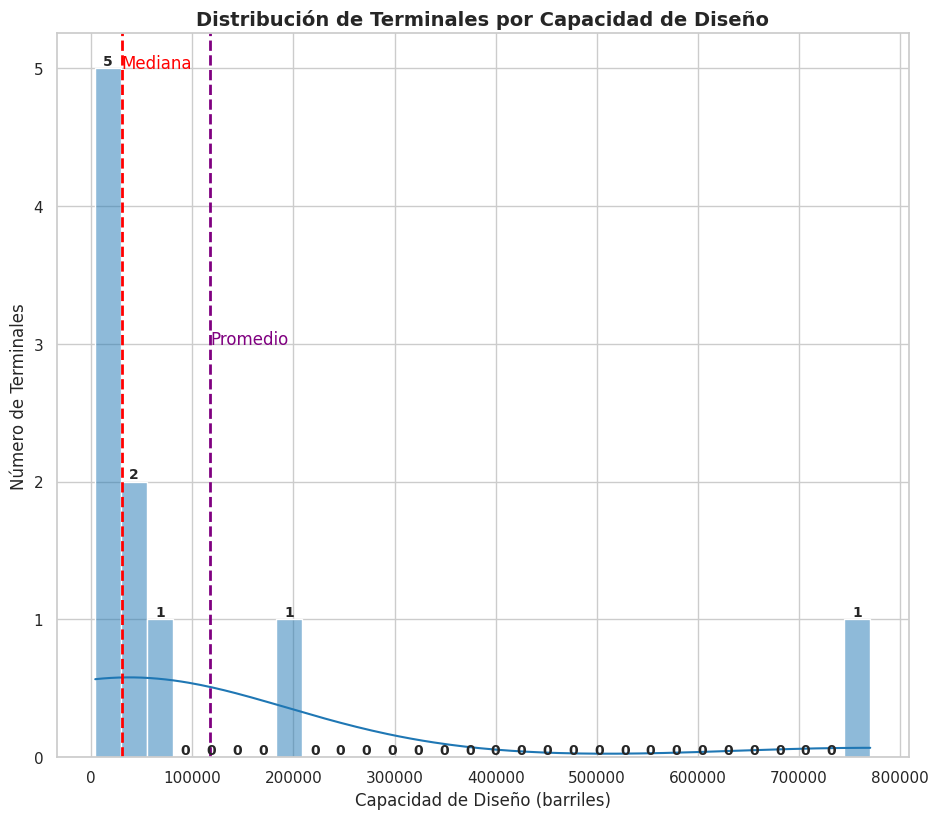

In [25]:
sns.histplot(
    data=terminales_gaslp_df,
    x='Capacidad_Diseño_barriles',
    bins=30,
    kde=True
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Distribución de Terminales por Capacidad de Diseño',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad de Diseño (barriles)')
plt.ylabel('Número de Terminales')

plt.axvline(
    x=terminales_gaslp_df['Capacidad_Diseño_barriles'].mean(),
    color='purple',
    linestyle='dashed',
    linewidth=2,
)

plt.text(
    terminales_gaslp_df.Capacidad_Diseño_barriles
    .mean(),3, 'Promedio', fontsize=12, color='purple'
)

plt.axvline(
    x=terminales_gaslp_df['Capacidad_Diseño_barriles'].median(),
    color='red',
    linestyle='dashed',
    linewidth=2,
)

plt.text(
    terminales_gaslp_df.Capacidad_Diseño_barriles
    .median(),5, 'Mediana', fontsize=12, color='red'
)

plt.savefig('../reports/figures/02_capacidades/06_histograma_capacidad_diseño_gaslp.png',
            dpi=300, bbox_inches='tight')

Histograma de Capacidad de Diseño > 200,000 barriles

Text(30000.0, 1, 'Mediana')

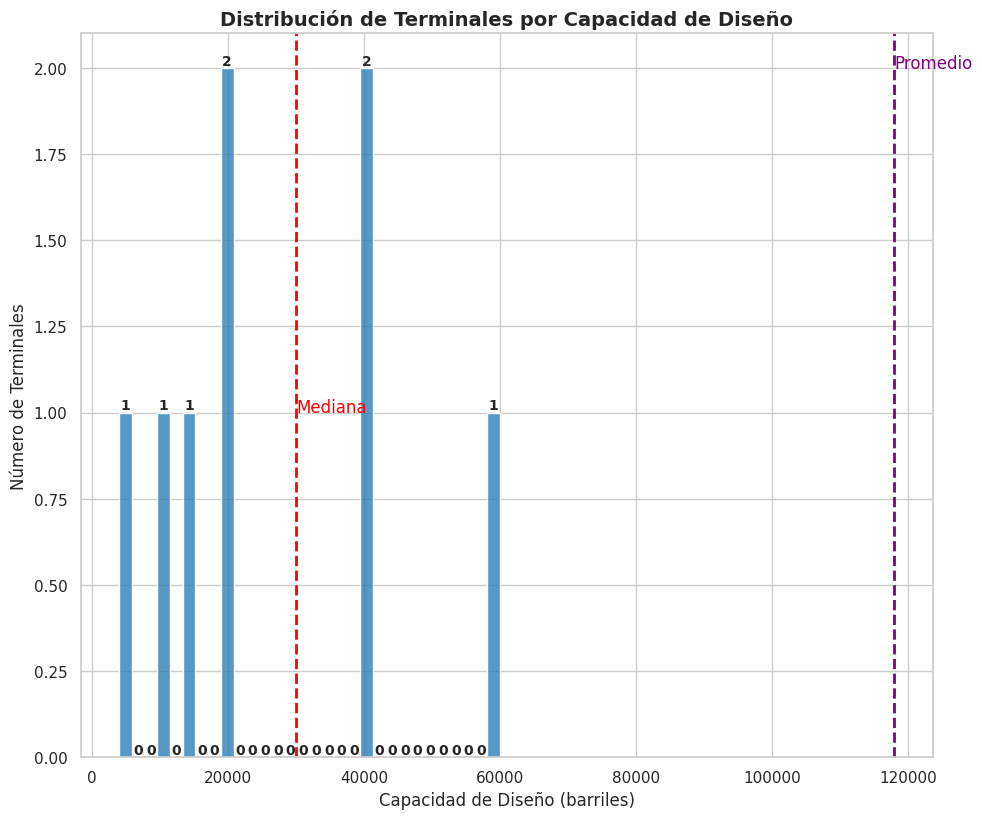

In [22]:
sns.histplot(
    data=terminales_gaslp_df[terminales_gaslp_df['Capacidad_Diseño_barriles'] <= 150_000],
    x='Capacidad_Diseño_barriles',
    bins=30,
)

for p in plt.gca().patches:
    plt.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        int(p.get_height()),
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Distribución de Terminales por Capacidad de Diseño',
          fontsize=14, fontweight='bold')

plt.xlabel('Capacidad de Diseño (barriles)')
plt.ylabel('Número de Terminales')

plt.axvline(
    x=terminales_gaslp_df['Capacidad_Diseño_barriles'].mean(),
    linestyle='dashed',
    linewidth=2,
    color='purple'
)

plt.text(
    terminales_gaslp_df.Capacidad_Diseño_barriles
    .mean(),2,'Promedio', fontsize=12, color='purple'
)

plt.axvline(
    x=terminales_gaslp_df['Capacidad_Diseño_barriles'].median(),
    linestyle='dashed',
    linewidth=2,
    color='red'
)

plt.text(
    terminales_gaslp_df.Capacidad_Diseño_barriles
    .median(),1,'Mediana', fontsize=12, color='red'
)

Capacidad de Diseño (barriles) >= 200,000 barriles

In [13]:
terminales_gaslp_df[terminales_gaslp_df['Capacidad_Diseño_barriles'] > 150_000]

,ID_Terminal,Nombre_Terminal,Tipo_Terminal,Región,Estado,Tipos_Productos_Almacenar,Año,Capacidad_Diseño_barriles
47,TAR_PLP_VER,Pajaritos GLP,Gas LP,Golfo,Veracruz,Gas Licuado de Petróleo,2015,770464
77,TAR_TLP_SIN,Topolobampo GLP,Gas LP,Noroeste,Sinaloa,Gas Licuado de Petróleo,2015,200000


RESÚMEN DE ANÁLISIS UNIVARIABLE

Variables Numéricas - Capacidad de Diseño (barriles)

In [14]:
numeric_variables = ['Capacidad_Diseño_barriles']

summary_table = []

for var in numeric_variables:
    total_len = len(terminales_gaslp_df)
    mayor = (terminales_gaslp_df[var] > 150_000).sum()
    minor_equal = (terminales_gaslp_df[var] <= 150_000).sum()

    summary_table.append({
        'Variable': var,
        '> 150,000 barriles (N)': mayor,
        '<= 150,000 barriles (N)': minor_equal,
        '> 150,000 barriles (%)': (mayor/total_len) * 100,
        '<= 150,000 barriles (%)': (minor_equal/total_len) * 100,
        'Promedio (barriles)': terminales_gaslp_df[var].mean(),
        'Mediana (barriles)': terminales_gaslp_df[var].median(),
        'Desviación Estandar': terminales_gaslp_df[var].std(),
    })

summary_numeric_table = pd.DataFrame(summary_table)
summary_numeric_table

,Variable,"> 150,000 barriles (N)","<= 150,000 barriles (N)","> 150,000 barriles (%)","<= 150,000 barriles (%)",Promedio (barriles),Mediana (barriles),Desviación Estandar
0,Capacidad_Diseño_barriles,2,8,20.00,80.00,"117,946.40","30,000.00","236,277.20"


Variables Categóricas - Región y Estado

In [15]:
category_variables = ['Región', 'Estado']

summary_category = {}

for var in category_variables:
    table = (
        terminales_gaslp_df[var]
        .value_counts()
        .rename_axis(var)
        .reset_index(name='Cantidad_Terminales')
    )

    table['Proporción (%)'] = (
        table['Cantidad_Terminales']/table['Cantidad_Terminales'].sum()*100
    )

    summary_category[var] = table

for var, table in summary_category.items():
    print(f'Distribuciones de Terminales por: {var}'),
    display(table)


Distribuciones de Terminales por: Región


,Región,Cantidad_Terminales,Proporción (%)
0,Centro,3,30.00
1,Sur,2,20.00
2,Golfo,2,20.00
3,Noroeste,2,20.00
4,Noreste,1,10.00


Distribuciones de Terminales por: Estado


,Estado,Cantidad_Terminales,Proporción (%)
0,Puebla,2,20.00
1,Veracruz,2,20.00
2,Tamaulipas,1,10.00
3,Chiapas,1,10.00
4,Baja California,1,10.00
5,Oaxaca,1,10.00
6,Sinaloa,1,10.00
7,Hidalgo,1,10.00
